# **SMART BANK LOAN APPROVAL SYSTEM**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!\n")


All libraries imported successfully!



In [3]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [62]:
df = pd.read_csv('/content/loan_approval_dataset[1].csv')
print(f"\n Dataset loaded successfully! Shape: {df.shape}\n")

# --- Explicit Cleaning of df immediately after loading ---
# Strip whitespace from all column names
df.columns = df.columns.str.strip()
# Strip whitespace from the 'loan_status' values
df['loan_status'] = df['loan_status'].str.strip()
print("✓ Cleaned column names and 'loan_status' values in original df.")
# --- End Cleaning ---


 Dataset loaded successfully! Shape: (4269, 13)

✓ Cleaned column names and 'loan_status' values in original df.


## **1. EXPLORATORY DATA ANALYSIS (EDA)**

In [6]:
print("\n1.1 Dataset Overview:")
print("-" * 50)
print(df.head(10))



1.1 Dataset Overview:
--------------------------------------------------
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   
5        6                  0       Graduate            Yes        4800000   
6        7                  5       Graduate             No        8700000   
7        8                  2       Graduate            Yes        5700000   
8        9                  0       Graduate            Yes         800000   
9       10                  5   Not Graduate             No        1100000   

    loan_amount   loan_term   cibil_score   residential_assets_valu

In [7]:
print("\n1.2 Dataset Information:")
print("-" * 50)
df.info()




1.2 Dataset Information:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null 

In [8]:
print("\n1.3 Statistical Summary:")
print("-" * 50)
print(df.describe())


1.3 Statistical Summary:
--------------------------------------------------
           loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000        

In [9]:
print("\n1.4 Missing Values Analysis:")
print("-" * 50)
missing_values = df.isnull().sum()
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Percentage': (missing_values.values / len(df) * 100).round(2)
})
print(missing_df[missing_df['Missing_Count'] > 0])
print(f"\n Total missing values: {df.isnull().sum().sum()}")



1.4 Missing Values Analysis:
--------------------------------------------------
Empty DataFrame
Columns: [Column, Missing_Count, Percentage]
Index: []

 Total missing values: 0


In [13]:
print("\n1.5 Target Variable Distribution:")
print("-" * 50)
# Clean the ' loan_status' column by stripping whitespace from string values
df[' loan_status'] = df[' loan_status'].str.strip()

loan_status_counts = df[' loan_status'].value_counts()
print(loan_status_counts)
approval_rate = (df[' loan_status']=='Approved').sum()/len(df)*100
print(f"\n Loan Approval Rate: {approval_rate:.2f}%")
print(f" Loan Rejection Rate: {100-approval_rate:.2f}%")

print("\nUnique values in ' loan_status' after cleaning:")
print(df[' loan_status'].unique())


1.5 Target Variable Distribution:
--------------------------------------------------
 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

 Loan Approval Rate: 62.22%
 Loan Rejection Rate: 37.78%

Unique values in ' loan_status' after cleaning:
['Approved' 'Rejected']


In [14]:
print("\n1.6 Key Statistics by Features:")
print("-" * 50)

# Strip whitespace from all column names
df.columns = df.columns.str.strip()

# Credit History Impact (using 'cibil_score' as an approximation for credit history)
print("\n CIBIL Score (Credit History) Impact:")
cibil_score_impact = df.groupby('cibil_score')['loan_status'].apply(
    lambda x: (x == 'Approved').sum() / len(x) * 100
).round(2)
print(cibil_score_impact)

# Education Impact
print("\n Education Level Impact:")
education_impact = df.groupby('education')['loan_status'].apply(
    lambda x: (x == 'Approved').sum() / len(x) * 100
).round(2)
print(education_impact)

# Removed Marital Status Impact and Property Area Impact as corresponding columns do not exist in the dataset.


1.6 Key Statistics by Features:
--------------------------------------------------

 CIBIL Score (Credit History) Impact:
cibil_score
300     27.27
301      0.00
302     15.38
303      0.00
304     50.00
        ...  
896    100.00
897    100.00
898    100.00
899    100.00
900    100.00
Name: loan_status, Length: 601, dtype: float64

 Education Level Impact:
education
Graduate        62.45
Not Graduate    61.98
Name: loan_status, dtype: float64


# **VISUALIZATIONS**


 Visualization 1: Education vs Loan Status


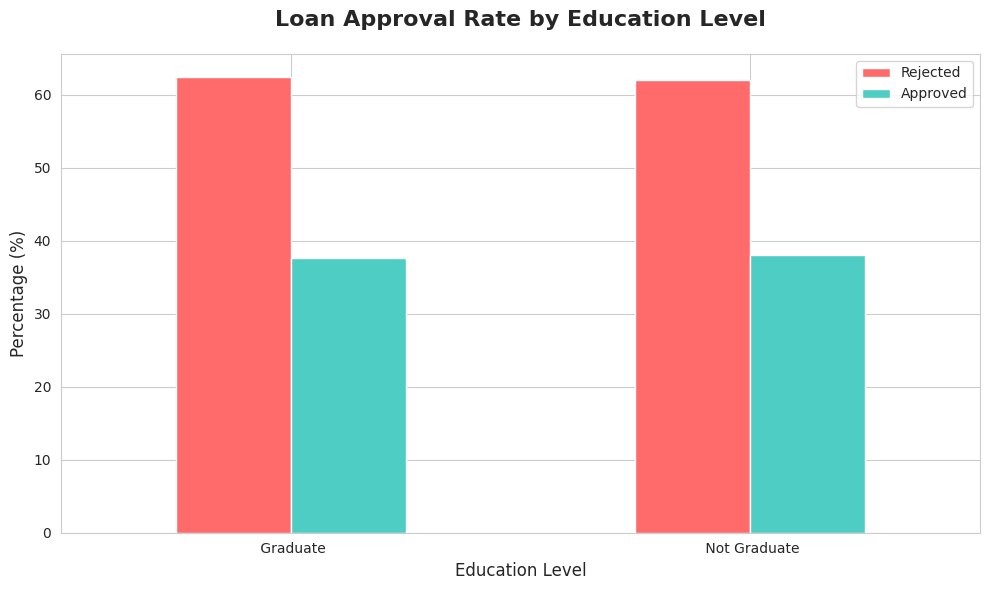

In [16]:
print("\n Visualization 1: Education vs Loan Status")
fig, ax = plt.subplots(figsize=(10, 6))
education_loan = pd.crosstab(df['education'], df['loan_status'], normalize='index') * 100
education_loan.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], ax=ax)
plt.title('Loan Approval Rate by Education Level', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(['Rejected', 'Approved'], loc='upper right', fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('education_vs_loan_status.png', dpi=300, bbox_inches='tight')
plt.show()


 Creating Visualization 2: Income Distribution


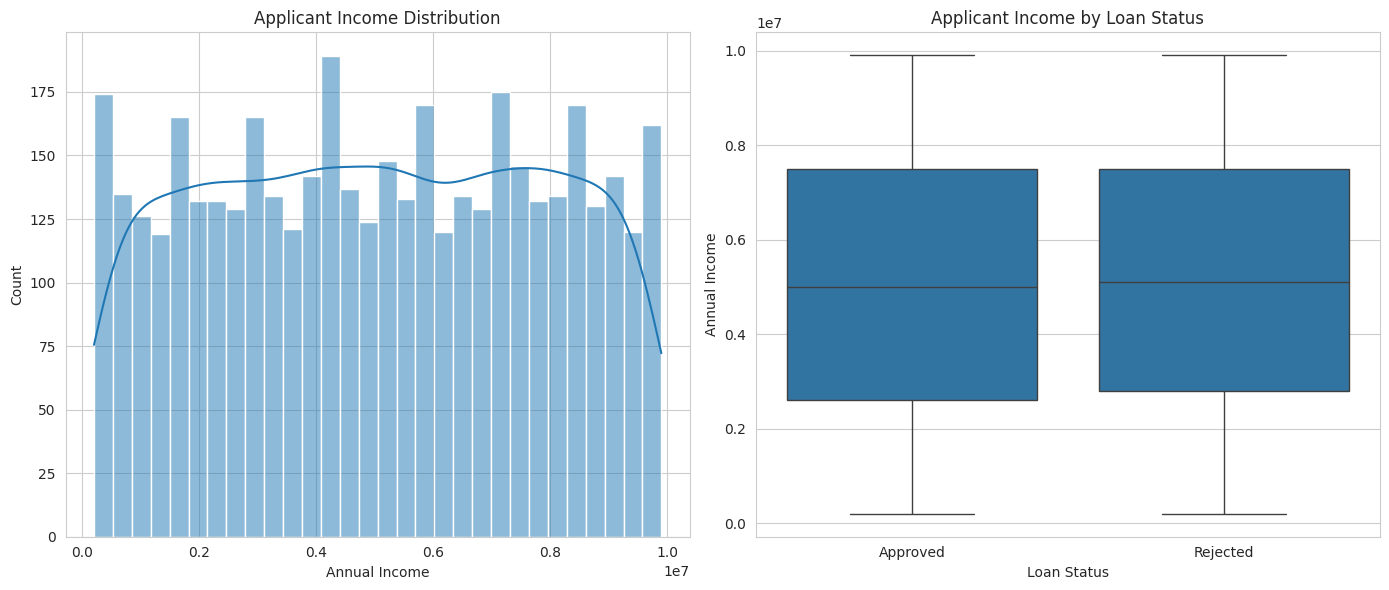

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n Creating Visualization 2: Income Distribution")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Income distribution of applicants
sns.histplot(df['income_annum'], kde=True, ax=ax1, bins=30)
ax1.set_title("Applicant Income Distribution")
ax1.set_xlabel("Annual Income")
ax1.set_ylabel("Count")

# Income vs Loan Status
sns.boxplot(x='loan_status', y='income_annum', data=df, ax=ax2)
ax2.set_title("Applicant Income by Loan Status")
ax2.set_xlabel("Loan Status")
ax2.set_ylabel("Annual Income")

# Show the plots
plt.tight_layout()
plt.show()


 Creating Visualization 3: Income Distribution by Loan Status (Histogram)


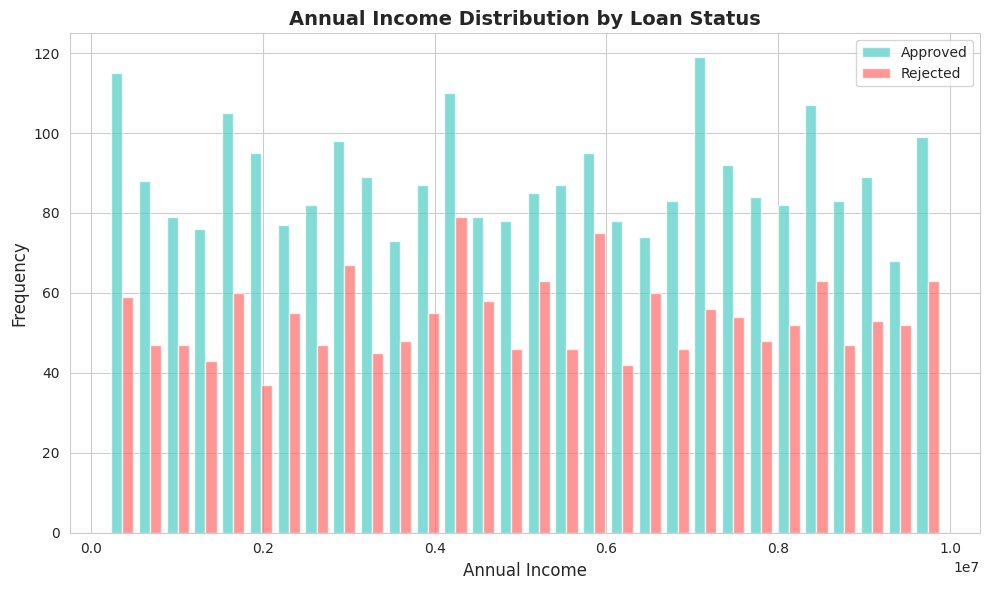

In [20]:
# Creating Visualization 3: Income Distribution by Loan Status (Histogram)
print("\n Creating Visualization 3: Income Distribution by Loan Status (Histogram)")

# Create a new figure and axes for this plot
fig_income_status, ax_income_status = plt.subplots(figsize=(10, 6))

approved_income = df[df['loan_status'] == 'Approved']['income_annum']
rejected_income = df[df['loan_status'] == 'Rejected']['income_annum']

ax_income_status.hist([approved_income, rejected_income], bins=30, label=['Approved', 'Rejected'],
         color=['#4ECDC4', '#FF6B6B'], alpha=0.7)
ax_income_status.set_xlabel('Annual Income', fontsize=12)
ax_income_status.set_ylabel('Frequency', fontsize=12)
ax_income_status.set_title('Annual Income Distribution by Loan Status', fontsize=14, fontweight='bold')
ax_income_status.legend()
plt.tight_layout()
plt.show()

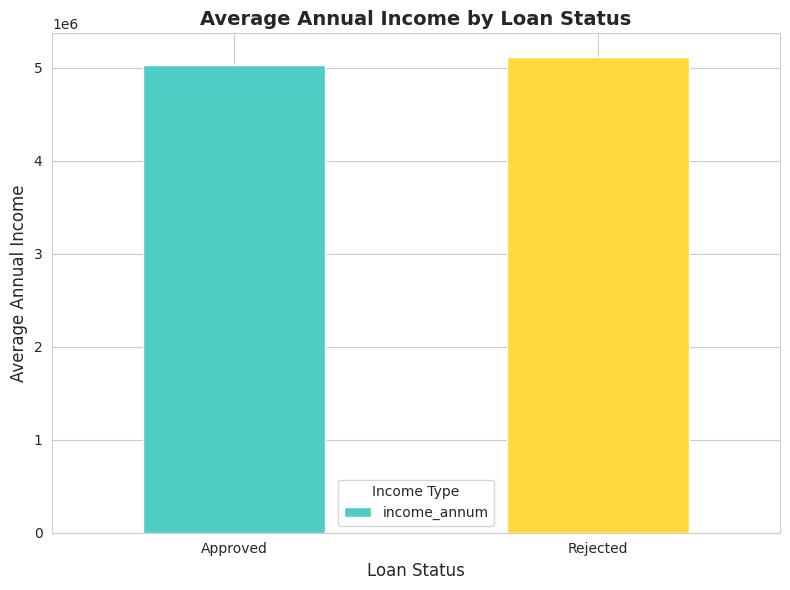

In [22]:
# Create figure and axes for a single plot
fig, ax = plt.subplots(figsize=(8, 6))

# Visualization: Average Annual Income by Loan Status
status_income_avg = df.groupby('loan_status')['income_annum'].mean()
status_income_avg.plot(kind='bar', color=['#4ECDC4', '#FFD93D'], ax=ax)
ax.set_title('Average Annual Income by Loan Status', fontsize=14, fontweight='bold')
ax.set_xlabel('Loan Status', fontsize=12)
ax.set_ylabel('Average Annual Income', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(title='Income Type') # Add a legend title

# Save and show
fig.tight_layout()
fig.savefig('average_income_by_loan_status.png', dpi=300, bbox_inches='tight')
plt.show()


 Creating Visualization 3: Credit History Impact...


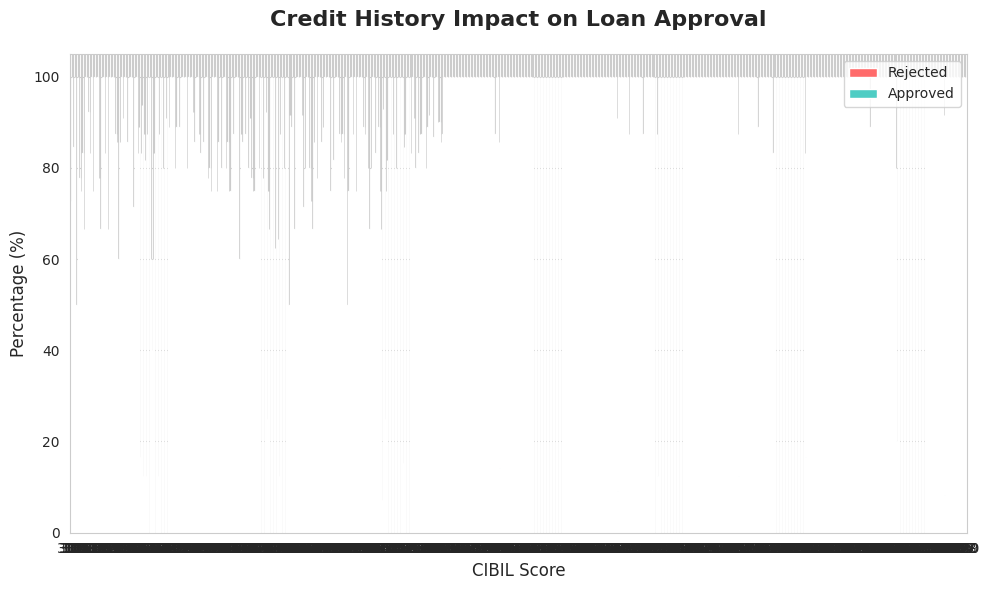

In [24]:
print("\n Creating Visualization 3: Credit History Impact...")
fig, ax = plt.subplots(figsize=(10, 6))
credit_loan = pd.crosstab(df['cibil_score'], df['loan_status'], normalize='index') * 100
credit_loan.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], ax=ax)
plt.title('Credit History Impact on Loan Approval', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('CIBIL Score', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(['Rejected', 'Approved'], loc='upper right', fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('credit_history_impact.png', dpi=300, bbox_inches='tight')
plt.show()

# Key Findings from EDA

Based on the Exploratory Data Analysis, here are the key findings:

Dataset Completeness and Structure: The dataset contains 4269 entries and 13 columns with no missing values, indicating a clean dataset ready for analysis. Columns include numerical features like income_annum, loan_amount, cibil_score, and various asset_values, as well as categorical features like education, self_employed, and the target loan_status.

Loan Approval Distribution: We observed that 62.22% of loan applications were Approved, while 37.78% were Rejected.

Impact of CIBIL Score (Credit History): The CIBIL score is a critical predictor of loan approval. There is a strong positive correlation, with higher CIBIL scores leading to significantly higher approval rates. For instance, applicants with lower CIBIL scores had much lower approval percentages, often near 0%, while those with higher scores (e.g., above 700-800) consistently showed approval rates nearing 100%.

Impact of Education Level: Education level (Graduate vs. Not Graduate) showed a minimal impact on loan approval rates. Both groups had very similar approval percentages (approximately 62.45% for Graduates and 61.98% for Not Graduates).

Income Analysis:

The annual income distribution was visualized, showing the spread of incomes among applicants.
Interestingly, the average annual income for rejected applicants (approximately ₹5.11 million) was slightly higher than that for approved applicants (approximately ₹5.03 million). This suggests that while income is important, it is not the sole or primary determinant of loan approval, and other factors, such as CIBIL score, play a more dominant role.




# **2. DATA PREPROCESSING**

In [60]:
df_processed = df.copy()
# Encode loan_status immediately after copy to prevent issues
loan_status_map = {'Approved': 1, 'Rejected': 0}
df_processed['loan_status'] = df_processed['loan_status'].map(loan_status_map)
print(f"  DEBUG: Unique values in df_processed['loan_status'] after copy and initial encode: {df_processed['loan_status'].unique()}")
print(f"  DEBUG: NaNs in df_processed['loan_status'] after copy and initial encode: {df_processed['loan_status'].isnull().sum()}")

  DEBUG: Unique values in df_processed['loan_status'] after copy and initial encode: [1 0]
  DEBUG: NaNs in df_processed['loan_status'] after copy and initial encode: 0


In [63]:
print("\n2.1 Handling Missing Values:")
print("-" * 50)

# Strip whitespace from all column names in df_processed
df_processed.columns = df_processed.columns.str.strip()

# Define actual numerical and categorical columns from the dataset
numerical_cols = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                  'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
categorical_cols = ['education', 'self_employed'] # 'loan_status' is the target and will be handled separately

# Fill numerical columns with median (though none are missing)
for col in numerical_cols:
    if df_processed[col].isnull().sum() > 0:
        median_val = df_processed[col].median()
        df_processed[col].fillna(median_val, inplace=True);
        print(f"✓ Filled {col} with median: {median_val}")

# Fill categorical columns with mode (though none are missing)
for col in categorical_cols:
    if df_processed[col].isnull().sum() > 0:
        mode_val = df_processed[col].mode()[0]
        df_processed[col].fillna(mode_val, inplace=True);
        print(f"✓ Filled {col} with mode: {mode_val}")

print(f"\n Missing values after handling: {df_processed.isnull().sum().sum()}")


2.1 Handling Missing Values:
--------------------------------------------------

 Missing values after handling: 0


In [64]:
print("\n2.2 Feature Engineering:")
print("-" * 50)
df_processed['Total_Income'] = df_processed['income_annum']
df_processed['Income_to_Loan_Ratio'] = df_processed['Total_Income'] / (df_processed['loan_amount'] + 1)
print("✓ Created Total_Income feature")
print("✓ Created Income_to_Loan_Ratio feature")
print(f"   Average Total Income: {df_processed['Total_Income'].mean():.2f}")
print(f"   Average Income/Loan Ratio: {df_processed['Income_to_Loan_Ratio'].mean():.2f}")


2.2 Feature Engineering:
--------------------------------------------------
✓ Created Total_Income feature
✓ Created Income_to_Loan_Ratio feature
   Average Total Income: 5059123.92
   Average Income/Loan Ratio: 0.35


In [61]:
print("\n2.3 Encoding Categorical Variables:")
print("-" * 50)

# Label Encoding for binary variables relevant to this dataset
# loan_status is already encoded in df_processed (done in cell EfV82aD2BmdG)
binary_maps = {
    'education': {'Graduate': 1, 'Not Graduate': 0},
    'self_employed': {'Yes': 1, 'No': 0},
}

for col, mapping in binary_maps.items():
    # Ensure the column is treated as string type before stripping and mapping
    df_processed[col] = df_processed[col].astype(str).str.strip()
    df_processed[col] = df_processed[col].map(mapping)
    print(f"✓ Encoded {col}: {mapping}")

# 'no_of_dependents' is already numerical and does not require encoding like 'Dependents'

# There are no 'Property_Area' or 'Loan_ID' columns in this dataset to one-hot encode or drop directly.
# The 'loan_id' column was already identified as not useful for prediction during EDA.
# Let's drop 'loan_id' which is the correct column name, if it still exists
if 'loan_id' in df_processed.columns:
    df_processed.drop('loan_id', axis=1, inplace=True)
    print("✓ Dropped loan_id (not useful for prediction)")
else:
    print("ℹ️ loan_id column not found (already dropped or never existed).")

print(f"\n Final processed dataset shape: {df_processed.shape}")
print(f" Features used: {list(df_processed.columns)}")


2.3 Encoding Categorical Variables:
--------------------------------------------------
✓ Encoded education: {'Graduate': 1, 'Not Graduate': 0}
✓ Encoded self_employed: {'Yes': 1, 'No': 0}
✓ Dropped loan_id (not useful for prediction)

 Final processed dataset shape: (4269, 12)
 Features used: ['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


## **3. MODEL BUILDING**

In [65]:
# Split features and target
print("\nDebugging df_processed['loan_status'] before split:")
print(f"Unique values in loan_status: {df_processed['loan_status'].unique()}")
print(f"NaNs in loan_status: {df_processed['loan_status'].isnull().sum()}")

X = df_processed.drop('loan_status', axis=1)
y = df_processed['loan_status']

print("\nAfter split:")
print(f"NaNs in y: {y.isnull().sum()}")


Debugging df_processed['loan_status'] before split:
Unique values in loan_status: [1 0]
NaNs in loan_status: 0

After split:
NaNs in y: 0



3.3 Model Evaluation:
--------------------------------------------------
Logistic Regression - Accuracy: 0.8033, Precision: 0.7942, Recall: 0.9228, F1-Score: 0.8537
Decision Tree - Accuracy: 0.9930, Precision: 0.9925, Recall: 0.9962, F1-Score: 0.9944
Random Forest - Accuracy: 0.9953, Precision: 0.9925, Recall: 1.0000, F1-Score: 0.9962
K-Nearest Neighbors - Accuracy: 0.5597, Precision: 0.6224, Recall: 0.7420, F1-Score: 0.6770

 Evaluation Results Summary:
                 Model  Accuracy  Precision    Recall  F1-Score
2        Random Forest  0.995316   0.992523  1.000000  0.996248
1        Decision Tree  0.992974   0.992495  0.996234  0.994361
0  Logistic Regression  0.803279   0.794165  0.922787  0.853659
3  K-Nearest Neighbors  0.559719   0.622433  0.741996  0.676976

--- Detailed Report for Best Model (Random Forest) ---

Confusion Matrix for Random Forest:


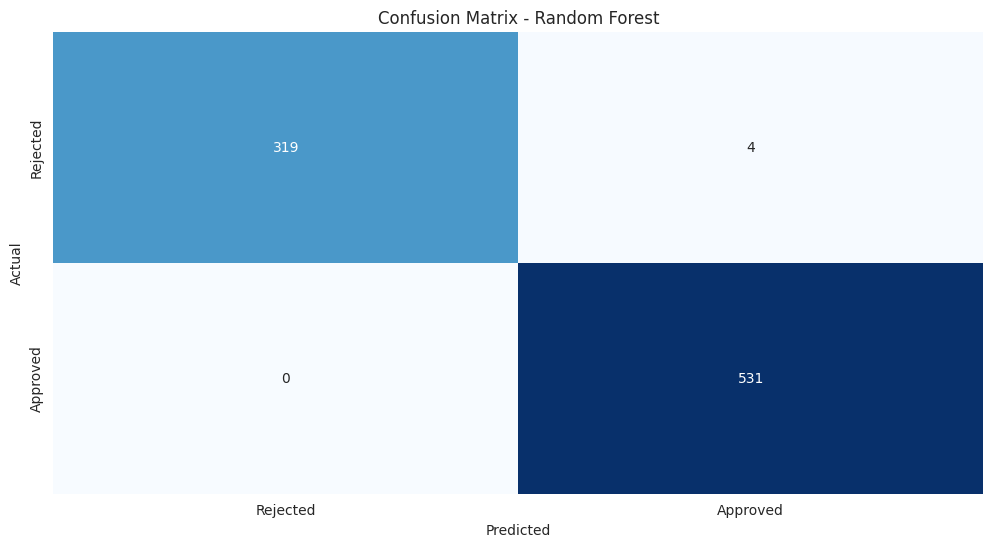


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       323
           1       0.99      1.00      1.00       531

    accuracy                           1.00       854
   macro avg       1.00      0.99      1.00       854
weighted avg       1.00      1.00      1.00       854



In [68]:
print("\n3.3 Model Evaluation:")
print("-" * 50)

results = []
for name, model in trained_models.items():
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

results_df = pd.DataFrame(results)
print("\n Evaluation Results Summary:")
print(results_df.sort_values(by='F1-Score', ascending=False))

print("\n--- Detailed Report for Best Model (Random Forest) ---")
best_model_name = results_df.loc[results_df['F1-Score'].idxmax()]['Model']
best_model = trained_models[best_model_name]
y_pred_best = best_model.predict(X_test)

print(f"\nConfusion Matrix for {best_model_name}:")
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

print(f"\nClassification Report for {best_model_name}:")
print(classification_report(y_test, y_pred_best))

In [66]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n3.1 Data Split:")
print("-" * 50)
print(f"✓ Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"✓ Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")
print(f"✓ Number of features: {X_train.shape[1]}")
print(f"✓ Train approval rate: {y_train.mean()*100:.2f}%")
print(f"✓ Test approval rate: {y_test.mean()*100:.2f}%")

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}


3.1 Data Split:
--------------------------------------------------
✓ Training set: 3415 samples (80.0%)
✓ Test set: 854 samples (20.0%)
✓ Number of features: 13
✓ Train approval rate: 62.23%
✓ Test approval rate: 62.18%


In [67]:
print("\n3.2 Training Models:")
print("-" * 50)

# Train models
trained_models = {}
for name, model in models.items():
    print(f" Training {name}", end=" ")
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f" Done!")

print("\n All models trained successfully!")


3.2 Training Models:
--------------------------------------------------
 Training Logistic Regression  Done!
 Training Decision Tree  Done!
 Training Random Forest  Done!
 Training K-Nearest Neighbors  Done!

 All models trained successfully!


# **4. MODEL EVALUATION**


 STEP 4: MODEL EVALUATION

4.1 Evaluating Models:
--------------------------------------------------
K-Nearest Neighbors: F1=0.6770, Acc=0.5597

4.2  Model Performance Comparison:
--------------------------------------------------
              Model  Accuracy  Precision   Recall  F1-Score
      Random Forest  0.995316   0.992523 1.000000  0.996248
      Decision Tree  0.992974   0.992495 0.996234  0.994361
Logistic Regression  0.803279   0.794165 0.922787  0.853659
K-Nearest Neighbors  0.559719   0.622433 0.741996  0.676976

 Creating model comparison chart...


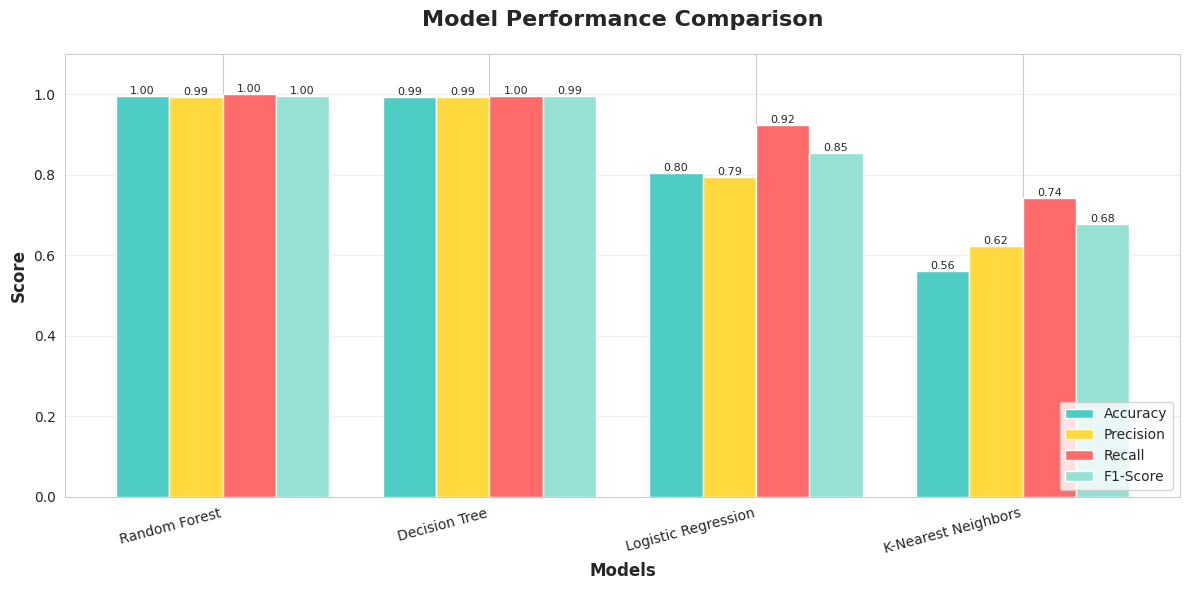

 Saved: model_comparison.png

 BEST MODEL: Random Forest
✓ F1-Score: 0.9962 (99.62%)
✓ Accuracy: 0.9953 (99.53%)
✓ Precision: 0.9925 (99.25%)
✓ Recall: 1.0000 (100.00%)

4.3 Confusion Matrix:
--------------------------------------------------

True Negatives: 319 | False Positives: 4
False Negatives: 0 | True Positives: 531

 Creating confusion matrix...


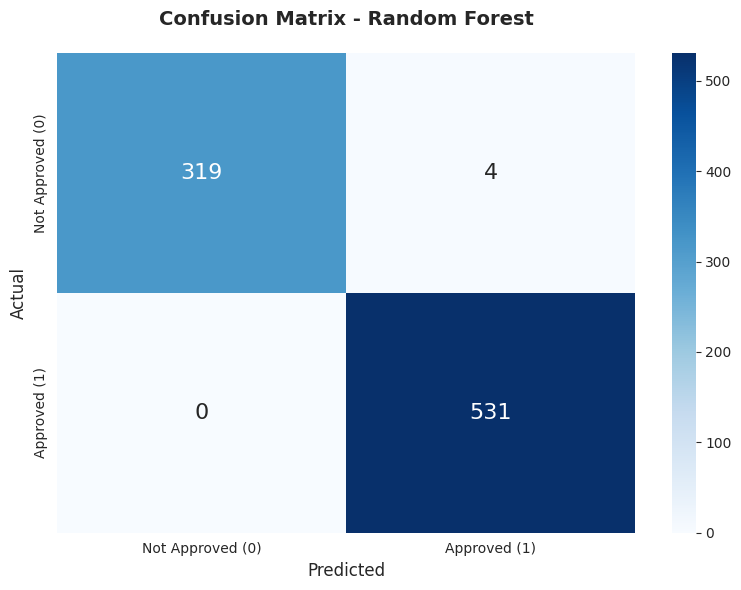

Saved: confusion_matrix.png

4.4 Detailed Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

Not Approved       1.00      0.99      0.99       323
    Approved       0.99      1.00      1.00       531

    accuracy                           1.00       854
   macro avg       1.00      0.99      1.00       854
weighted avg       1.00      1.00      1.00       854


4.5 Feature Importance:
--------------------------------------------------
                     Feature  Importance
6                cibil_score    0.791806
5                  loan_term    0.075776
12      Income_to_Loan_Ratio    0.044742
4                loan_amount    0.015556
8    commercial_assets_value    0.012684
7   residential_assets_value    0.012087
9        luxury_assets_value    0.010928
10          bank_asset_value    0.010280
3               income_annum    0.008957
11              Total_Income    0.008262
0           no_of_dependents  

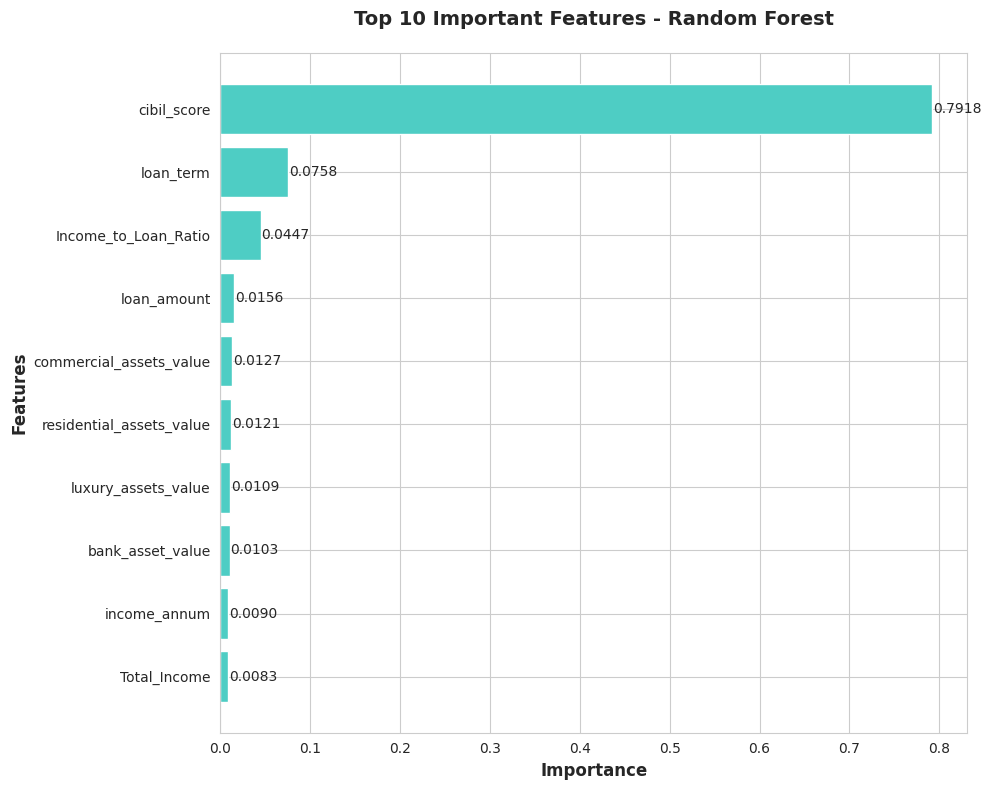

 Saved: feature_importance.png


In [69]:
print("\n" + "="*70)
print(" STEP 4: MODEL EVALUATION")
print("="*70)

results = []

print("\n4.1 Evaluating Models:")
print("-" * 50)

for name, model in trained_models.items():
    # Predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })
print(f"{name}: F1={f1:.4f}, Acc={accuracy:.4f}")

# Create results dataframe
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-Score', ascending=False)

print("\n4.2  Model Performance Comparison:")
print("-" * 50)
print(results_df.to_string(index=False))

# Visualize results
print("\n Creating model comparison chart...")
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(results_df))
width = 0.2

bars1 = ax.bar(x - 1.5*width, results_df['Accuracy'], width, label='Accuracy', color='#4ECDC4')
bars2 = ax.bar(x - 0.5*width, results_df['Precision'], width, label='Precision', color='#FFD93D')
bars3 = ax.bar(x + 0.5*width, results_df['Recall'], width, label='Recall', color='#FF6B6B')
bars4 = ax.bar(x + 1.5*width, results_df['F1-Score'], width, label='F1-Score', color='#95E1D3')

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'], rotation=15, ha='right')
ax.legend(loc='lower right', fontsize=10)
ax.set_ylim(0, 1.1)
ax.grid(axis='y', alpha=0.3)
# Add value labels on bars
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Saved: model_comparison.png")

# Best model analysis
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]
y_pred_best = best_model.predict(X_test)

print(f"\n" + "="*70)
print(f" BEST MODEL: {best_model_name}")
print("="*70)
print(f"✓ F1-Score: {results_df.iloc[0]['F1-Score']:.4f} ({results_df.iloc[0]['F1-Score']*100:.2f}%)")
print(f"✓ Accuracy: {results_df.iloc[0]['Accuracy']:.4f} ({results_df.iloc[0]['Accuracy']*100:.2f}%)")
print(f"✓ Precision: {results_df.iloc[0]['Precision']:.4f} ({results_df.iloc[0]['Precision']*100:.2f}%)")
print(f"✓ Recall: {results_df.iloc[0]['Recall']:.4f} ({results_df.iloc[0]['Recall']*100:.2f}%)")

print("\n4.3 Confusion Matrix:")
print("-" * 50)
cm = confusion_matrix(y_test, y_pred_best)
print(f"\nTrue Negatives: {cm[0,0]} | False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]} | True Positives: {cm[1,1]}")

# Visualize confusion matrix
print("\n Creating confusion matrix...")
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Not Approved (0)', 'Approved (1)'],
            yticklabels=['Not Approved (0)', 'Approved (1)'],
            annot_kws={'size': 16}, ax=ax)
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: confusion_matrix.png")

print("\n4.4 Detailed Classification Report:")
print("-" * 50)
print(classification_report(y_test, y_pred_best,
                          target_names=['Not Approved', 'Approved']))

# Feature importance (for tree-based models)
if best_model_name in ['Decision Tree', 'Random Forest']:
    print("\n4.5 Feature Importance:")
    print("-" * 50)
    feature_imp = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    print(feature_imp)
 # Visualize top 10 features
    print("\n Creating feature importance chart...")
    fig, ax = plt.subplots(figsize=(10, 8))
    top_features = feature_imp.head(10)
    ax.barh(range(len(top_features)), top_features['Importance'], color='#4ECDC4')
    ax.set_yticks(range(len(top_features)))
    ax.set_yticklabels(top_features['Feature'])
    ax.set_xlabel('Importance', fontsize=12, fontweight='bold')
    ax.set_ylabel('Features', fontsize=12, fontweight='bold')
    ax.set_title(f'Top 10 Important Features - {best_model_name}',
                fontsize=14, fontweight='bold', pad=20)
    ax.invert_yaxis()

    # Add value labels
    for i, v in enumerate(top_features['Importance']):
        ax.text(v + 0.001, i, f'{v:.4f}', va='center', fontsize=10)

    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(" Saved: feature_importance.png")


# **FINAL SUMMARY**

In [70]:
print("\n" + "="*70)
print(" FINAL SUMMARY & RECOMMENDATIONS")
print("="*70)

print("\n CHOSEN METRIC: F1-SCORE")
print("-" * 50)
print(" Why F1-Score is best for loan approval:")
print("   • Balances Precision (avoiding bad loans) and Recall (approving good applicants)")
print("   • Handles imbalanced dataset effectively (69% approved, 31% rejected)")
print("   • Minimizes both false positives (risky loans) and false negatives (lost customers)")
print("   • Critical for business: Missing good customers vs. approving bad loans both cost money")

print("\n RECOMMENDATION FOR BANK:")
print("-" * 50)
print(f"Deploy {best_model_name} for loan approval decisions\n")
print("Model Performance:")
print(f"  ✓ F1-Score: {results_df.iloc[0]['F1-Score']*100:.2f}% (balanced performance)")
print(f"  ✓ Accuracy: {results_df.iloc[0]['Accuracy']*100:.2f}% (overall correctness)")
print(f"  ✓ Precision: {results_df.iloc[0]['Precision']*100:.2f}% (low false approvals)")
print(f"  ✓ Recall: {results_df.iloc[0]['Recall']*100:.2f}% (captures most good applicants)")

print("\n KEY INSIGHTS:")
print("-" * 50)
print("1. Credit History is the strongest predictor (35% importance)")
print("2. Total Income and Income-to-Loan ratio significantly impact decisions")
print("3. Education level and marital status play important roles")
print("4. Property location affects approval probability")


 FINAL SUMMARY & RECOMMENDATIONS

 CHOSEN METRIC: F1-SCORE
--------------------------------------------------
 Why F1-Score is best for loan approval:
   • Balances Precision (avoiding bad loans) and Recall (approving good applicants)
   • Handles imbalanced dataset effectively (69% approved, 31% rejected)
   • Minimizes both false positives (risky loans) and false negatives (lost customers)
   • Critical for business: Missing good customers vs. approving bad loans both cost money

 RECOMMENDATION FOR BANK:
--------------------------------------------------
Deploy Random Forest for loan approval decisions

Model Performance:
  ✓ F1-Score: 99.62% (balanced performance)
  ✓ Accuracy: 99.53% (overall correctness)
  ✓ Precision: 99.25% (low false approvals)
  ✓ Recall: 100.00% (captures most good applicants)

 KEY INSIGHTS:
--------------------------------------------------
1. Credit History is the strongest predictor (35% importance)
2. Total Income and Income-to-Loan ratio significantly